In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import sys
sys.path.insert(0, '../src')

from aspyre.source.star import Starfile
from aspyre.basis.fb_3d import FBBasis3D
from aspyre.estimation.mean import MeanEstimator

In [3]:
L = 16
source = Starfile('E:\\yan_wu\\All_class001_r1_ct1_data.star', pixel_size=1.338, max_rows=10000)
source.set_max_resolution(L)
source.cache()

2019/06/21 13:25:30 Loading starfile at path E:\yan_wu\All_class001_r1_ct1_data.star
2019/06/21 13:25:40 Read starfile with 335856 records
2019/06/21 13:25:41 Image size = 200x200
2019/06/21 13:25:41 Scaling SourceFilter by factor 12.5
2019/06/21 13:25:41 Caching source images


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:43<00:00, 230.45it/s]


2019/06/21 13:26:37 Whitening source object
2019/06/21 13:26:37 Determining Whitening Filter
2019/06/21 13:26:37 Determining Noise variance in batches of 512
2019/06/21 13:26:37 Noise variance = 0.026519039269626045
2019/06/21 13:26:37 Getting all images
2019/06/21 13:26:37 Applying whitening filter to all images and caching
2019/06/21 13:26:38 Caching source images


<IPython.core.display.Javascript object>


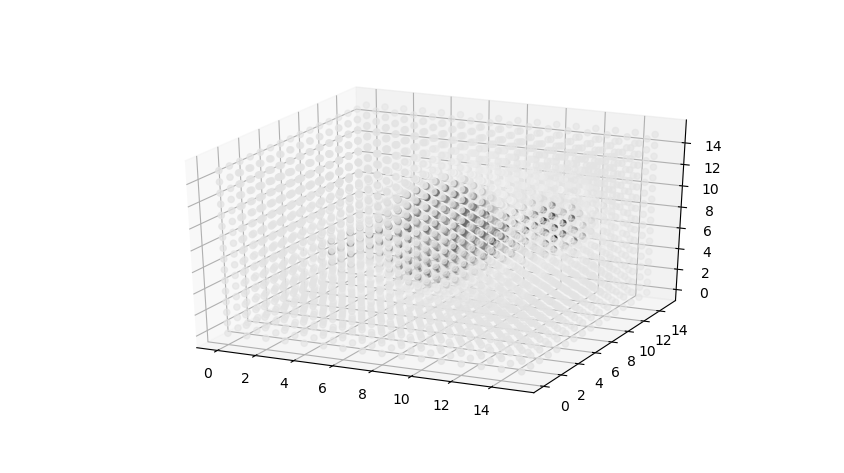

In [4]:
source.whiten()
images = source.images(0, 5)

n_images = images.shape[-1]
plt.figure(figsize=(10,3))
for i in range(n_images):
    plt.subplot(1, n_images, i+1)
    plt.imshow(images[:,:,i])

In [5]:
basis = FBBasis3D((L, L, L))
mean_estimator = MeanEstimator(source, basis, batch_size=8192)
mean_est = mean_estimator.estimate()

2019/06/21 13:26:45 Expanding 3D map in spatial domain.
2019/06/21 13:26:46 Trying NFFT backend finufft
2019/06/21 13:26:46 NFFT backend finufft usable
2019/06/21 13:26:46 Trying NFFT backend pynfft
2019/06/21 13:26:46 NFFT backend pynfft not usable
2019/06/21 13:26:46 Selected NFFT backend = finufft
2019/06/21 13:26:52 Determined adjoint mappings. Shape = (1008,)
2019/06/21 13:26:52 Computing kernel
2019/06/21 13:26:53 Computing non-centered Fourier Transform
2019/06/21 13:26:53 Computing Preconditioner kernel
2019/06/21 13:26:53 Circularizing kernel
2019/06/21 13:26:53 Circularizing dimension 0
2019/06/21 13:26:53 Circularizing dimension 1
2019/06/21 13:26:53 Circularizing dimension 2


Running Conjugate Gradient Optimizer: 14it [00:01,  8.18it/s]


In [6]:
vol = mean_est
# Visualize volume
L = vol.shape[0]

x, y, z = np.meshgrid(np.arange(L), np.arange(L), np.arange(L))
ax = plt.axes(projection='3d')
vol = (vol - np.min(vol))/(np.max(vol)-np.min(vol))
cmap = plt.get_cmap("Greys_r")
ax.scatter3D(x, y, z, c=vol.flatten(), cmap=cmap)
plt.show()